In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 606us/step - loss: 2.6310 - acc: 0.5160 - val_loss: 1.7490 - val_acc: 0.6150
Epoch 2/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.4180 - acc: 0.7036 - val_loss: 1.2992 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.0414 - acc: 0.7789 - val_loss: 1.1348 - val_acc: 0.7250
Epoch 4/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.8137 - acc: 0.8262 - val_loss: 1.0159 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.6423 - acc: 0.8668 - val_loss: 0.9627 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.5087 - acc: 0.8958 - val_loss: 0.9015 - val_acc: 0.8110
Epoch 7/20
7982/7982 [========================

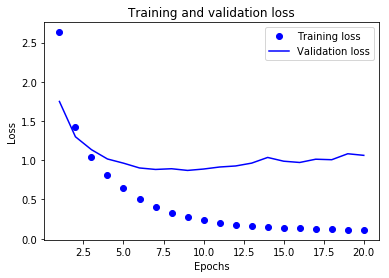

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

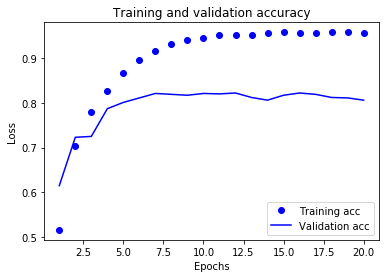

In [17]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 98us/step - loss: 2.7251 - acc: 0.5177 - val_loss: 1.7578 - val_acc: 0.6390
Epoch 2/8
7982/7982 [==============================] - 1s 69us/step - loss: 1.4242 - acc: 0.7050 - val_loss: 1.2974 - val_acc: 0.7120
Epoch 3/8
7982/7982 [==============================] - 1s 69us/step - loss: 1.0412 - acc: 0.7726 - val_loss: 1.1194 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 69us/step - loss: 0.8103 - acc: 0.8218 - val_loss: 1.0321 - val_acc: 0.7710
Epoch 5/8
7982/7982 [==============================] - 1s 69us/step - loss: 0.6412 - acc: 0.8632 - val_loss: 0.9519 - val_acc: 0.7990
Epoch 6/8
7982/7982 [==============================] - 1s 70us/step - loss: 0.5098 - acc: 0.8936 - val_loss: 0.9564 - val_acc: 0.7860
Epoch 7/8
7982/7982 [==============================] - 1s 71us/step - loss: 0.4042 - acc: 0.9174 - val_loss: 0.8955 - val_acc: 0.8240
Epoch 8/8
2246

In [19]:
results

[0.9646809735896857, 0.7880676759212865]

In [20]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.20525378450578807

In [0]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

0.9999998

In [24]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 116us/step - loss: 2.4163 - acc: 0.4911 - val_loss: 1.8496 - val_acc: 0.5600
Epoch 2/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.6850 - acc: 0.5658 - val_loss: 1.6163 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.4427 - acc: 0.6106 - val_loss: 1.4965 - val_acc: 0.6160
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.2655 - acc: 0.6332 - val_loss: 1.4104 - val_acc: 0.6200
Epoch 5/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.1124 - acc: 0.6934 - val_loss: 1.3642 - val_acc: 0.6800
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.9846 - acc: 0.7407 - val_loss: 1.3379 - val_acc: 0.6860
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8822 - acc: 0.7551 - val_loss: 1.3108 - val_acc: 0.6900
Epoch 

In [28]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.7294 - acc: 0.6512 - val_loss: 1.1944 - val_acc: 0.7530
Epoch 2/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.8553 - acc: 0.8145 - val_loss: 0.9746 - val_acc: 0.7820
Epoch 3/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.5476 - acc: 0.8866 - val_loss: 0.8504 - val_acc: 0.8240
Epoch 4/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.3757 - acc: 0.9222 - val_loss: 0.8567 - val_acc: 0.8210
Epoch 5/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.2727 - acc: 0.9376 - val_loss: 0.8903 - val_acc: 0.8200
Epoch 6/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.2177 - acc: 0.9463 - val_loss: 0.8997 - val_acc: 0.8220
Epoch 7/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.1892 - acc: 0.9505 - val_loss: 1.0633 - val_acc: 0.7990
Epoch 

In [29]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.5761 - acc: 0.6580 - val_loss: 1.0968 - val_acc: 0.7510
Epoch 2/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.7796 - acc: 0.8294 - val_loss: 0.9494 - val_acc: 0.8010
Epoch 3/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.4636 - acc: 0.8994 - val_loss: 0.8641 - val_acc: 0.8170
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.3017 - acc: 0.9337 - val_loss: 0.8818 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.2261 - acc: 0.9456 - val_loss: 0.9584 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.1922 - acc: 0.9503 - val_loss: 0.9617 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.1686 - acc: 0.9530 - val_loss: 1.0827 - val_acc: 0.7870
Epoc

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 143us/step - loss: 3.1741 - acc: 0.4523 - val_loss: 2.4802 - val_acc: 0.5060
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 2.1994 - acc: 0.5065 - val_loss: 1.9630 - val_acc: 0.5290
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.8569 - acc: 0.5243 - val_loss: 1.7998 - val_acc: 0.5410
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.7106 - acc: 0.5342 - val_loss: 1.7514 - val_acc: 0.5400
Epoch 5/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.6199 - acc: 0.5405 - val_loss: 1.7032 - val_acc: 0.5460
Epoch 6/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.5583 - acc: 0.5455 - val_loss: 1.6755 - val_acc: 0.5490
Epoch 7/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.5105 - acc: 0.5480 - val_loss: 1.6575 - val_acc: 0.5500
Epoch 